<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/3_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación: Introducción

El primer paso en la simulación de procesos estocásticos es la geración de números aleatorios, osea, generar números en el  intervalo [0,1] donde todos los valores tienen la misma chance de ocurrir. Mayores detalles sobre el método en https://en.wikipedia.org/wiki/Linear_congruential_generator

En el método del Generador Congruencial Lineal se genera una secuencia de números pseudo-aleatorios según la relación:

$$X_{n+1} = (aX_n + c) \mod m,$$

donde $X_0$ es la semilla, m, a y c son enteros positivos. La secuencia verifica  $0 \leq X_i \leq m$. Para generar un número en el intervalo [0,1], usamos $$U_n = X_n/m.$$
Vamos considerar el ejemplo.

[1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1, 11, 9, 3, 1]


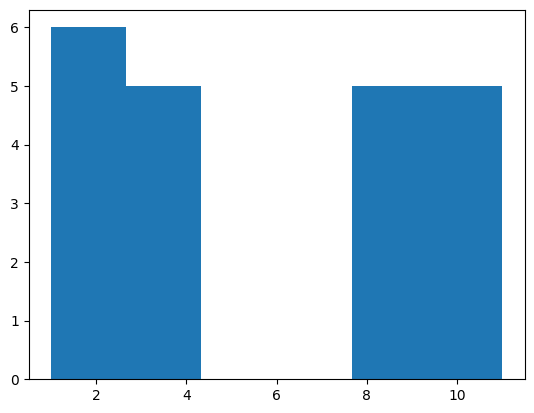

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random(Xi, a, c, m):
    Xii = (a*Xi + c)%m
    return Xii

a = 11
c = 0
m = 16
X0 = 1
n = 20 # number of numbers to be generated
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi)
print(X)
plt.hist(X, bins='auto')
plt.show(True)

Notamos que la secuencia es periódica, siendo que $[1, 11, 9, 3]$ se repite. Osea, no tenemos un buen generador de números aleatorios, por lo que podemos predecir que el siguiente número se descubrirá de forma secuencial. Una posible solución para solucionar este problema es adoptar valores mayores para las constantes.

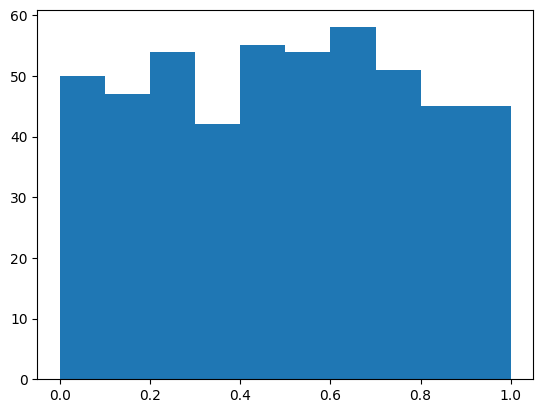

In [ ]:
a = 7**5
c = 0
m = 2**31 - 1
X0 = 1
n = 500 # number of numbers to be generated
Xi = X0
X = [X0]
for i in range(n):
    Xi= random(Xi,a,c,m)
    X.append(Xi/m)
#print(X)
plt.hist(X, bins='auto')
plt.show(True)

Vemos que ahora la frecuencia con la que aparecen los números es prácticamente la misma.

## Retirando una bola en una urna

Para comenzar a comprender la simulación de procesos estocásticos, simulemos la extracción de una bola de una urna con reposición, es decir, la bola extraída siempre se repone en la urna antes de la siguiente extracción.

Supongamos una urna con 6 bolas blancas y 4 negras:

In [ ]:
urna = ['B','B','B','B','B','B','P','P','P','P']
print('Urna:',urna)

Urna: ['B', 'B', 'B', 'B', 'B', 'B', 'P', 'P', 'P', 'P']


Para seleccionar una bola, simplemente seleccione una posición en el vector y verifique la bola respectiva. Hagamos este retiro 100 veces y comprobemos cuántas veces retiramos una bola blanca.

In [ ]:
import random # libreria para generar números aleatorios
n = 0 # número de veces que se retira una bola blanca
nsim = 100 # número de experimentos
for i in range(0,nsim):
    posicao = random.randint(0,len(urna)-1)
    if(urna[posicao] == 'B'):
        n = n + 1
print('Proporción de veces que salio una bola blanca:', n/nsim)

Proporción de veces que salio una bola blanca: 0.61


In [ ]:
# Calculando el valor teórico
valor_teorico = 0
for bola in urna:
    if (bola == 'B'):
        valor_teorico = valor_teorico + 1
valor_teorico = valor_teorico/len(urna)
print('Valor teórico:', valor_teorico)

Valor teórico: 0.6


Pues vemos que se acerca al valor teórico: 6/10. Si aumentamos el número de experimentos, mostramos los resultados en un gráfico.

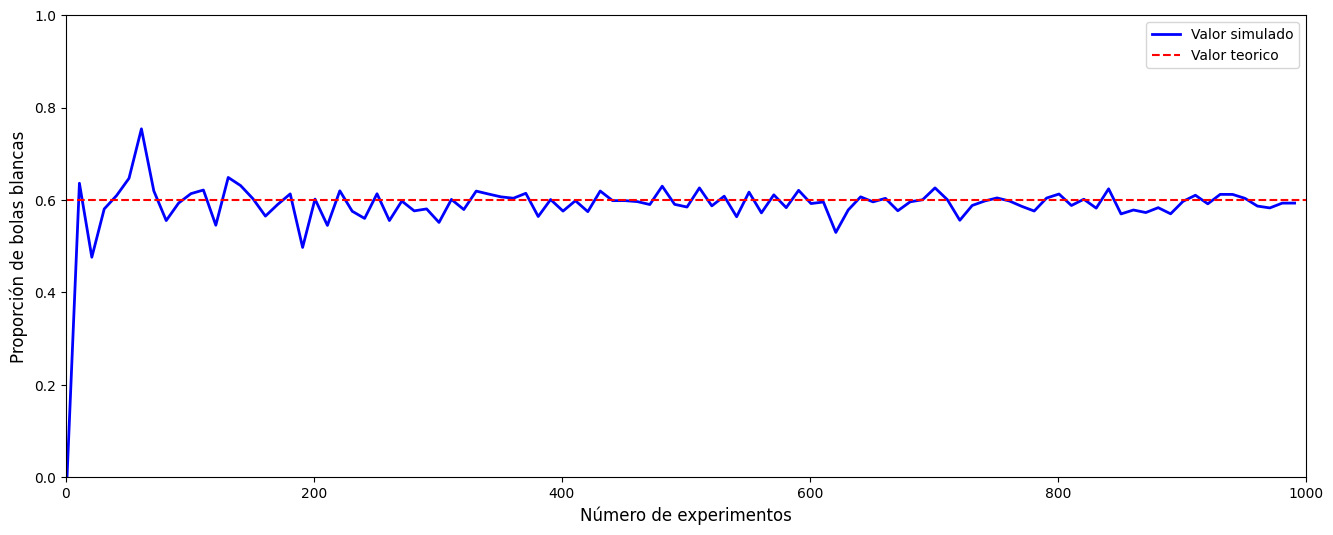

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


vp = [] # lista que almacena la proporción de ocurrencias en función del número de simulaciones.
vsim = [] # almacena el número de simulaciones
Nmax = 1000 # número máximo de simulaciones
for nsim in np.arange(1,Nmax,10):
    n = 0 # número de veces que retiramos una bola blanca
    for i in range(0,nsim):
        posicao = random.randint(0,len(urna)-1)
        if(urna[posicao] == 'B'):
            n = n + 1
    vp.append(n/nsim)
    vsim.append(nsim)

plt.figure(figsize=(16,6))
plt.plot(vsim, vp, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=valor_teorico, color='r', linestyle='--', label = 'Valor teorico')
plt.ylabel("Proporción de bolas blancas", fontsize=12)
plt.xlabel("Número de experimentos", fontsize=12)
plt.xlim([0.0, Nmax])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True)

En conclusión, vemos que el valor converge a la probabilidad esperada.

> **Ejercício**: Considere ahora una urna con 14 bolas blancas y 6 negras. Repita el procedimento previo y verifique si la estimación es correcta.

## Lanzando una moneda

Simulemos lanzar una moneda al aire. Para hacer esto, necesitamos definir una regla para elegir si sale cara o sello. Para comprender mejor cómo definir esta regla, tenga en cuenta que en el ejemplo anterior ordenamos las bolas en un vector. Este orden no hace la más mínima diferencia en el ejemplo anterior, ya que no lo consideramos. Si consideramos el orden, la regla podría ser: si la posición en el vector es menor o igual a 6, entonces la bola es blanca. De lo contrario, es negro. En otras palabras, podemos utilizar esta regla para definir cuál de los valores seleccionaremos.

En el caso de una moneda, supongamos que $p$ es la probabilidad de obtener cara. Entonces, la regla podría ser: si el número extraído en [0,1] es menor que $p$, entonces cara. De lo contrario, era sello. Hagamos un experimento.

In [ ]:
p = 0.6 # probabilidad de salir cara

<ipython-input-8-c2ca5fbaecbb>:9: RuntimeWarning: invalid value encountered in scalar divide
  vp.append(nhead/nsim)


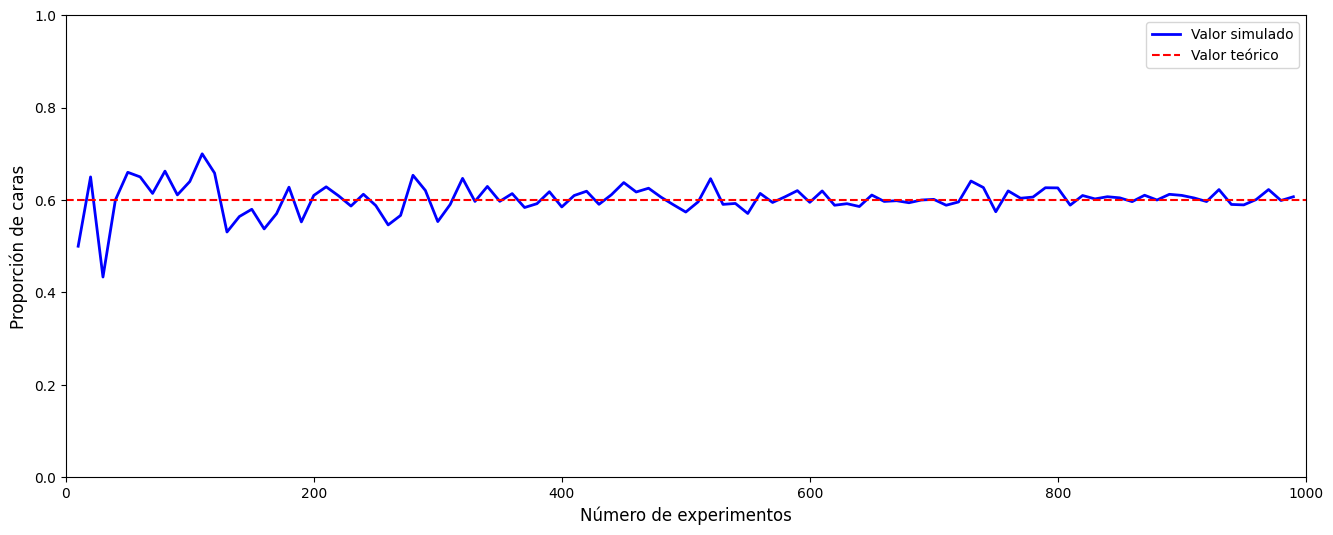

In [ ]:
vp = []
vsim = []
Nmax = 1000
for nsim in np.arange(0,Nmax,10):
    nhead = 0
    for i in range(1,nsim):
        if(np.random.uniform() < p):
            nhead = nhead + 1
    vp.append(nhead/nsim)
    vsim.append(nsim)

plt.figure(figsize=(16,6))
plt.plot(vsim, vp, linestyle='-', color="blue", linewidth=2,label = 'Valor simulado')
plt.axhline(y=p, color='r', linestyle='--', label = 'Valor teórico')
plt.ylabel("Proporción de caras", fontsize=12)
plt.xlabel("Número de experimentos", fontsize=12)
plt.xlim([0.0, Nmax])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True)

> **Ejercício**: Varie la probabilidad de salir cara y verifique como varia el gráfico.

## Calculando el valor de $\pi$

Para calcular el valor de $\pi$, vamos considerar un cuadrado de lado 2R que contiene un círculo de radio R, conforme a la figura







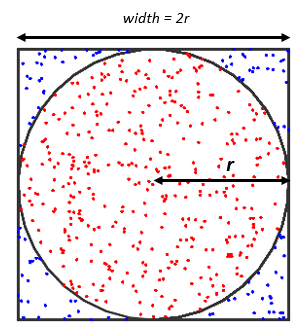

Seleccionando posiciones aleatorias en esta región e incluyendo puntos, como se muestra en la figura, tenemos que algunos puntos caen dentro del círculo (puntos rojos), mientras que otros caen fuera (puntos azules). Insertar una gran cantidad de puntos al azar, tenemos que

$$\frac{\text{N° de puntos dentro de la circunferencia}}{\text{N° de puntos generados}} ≈ \frac{\text{Área de la circunferencia}}{\text{Área del cuadrado}}.$$

Osea, el valor de $\pi$:

$$\frac{\text{N° de puntos dentro de la circunferencia}}{\text{N° de puntos generados}} \approx \frac{\pi R^2}{4R^2}.$$

Entonces:

$$\pi ≈ 4 \times \frac{\text{N° de puntos dentro de la circunferencia}}{\text{N° de puntos generados}}.$$

In [ ]:
n = 1000
count_inside = 0
for i in np.arange(0,n):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    if( x**2 + y**2 < 1):
        count_inside = count_inside + 1
pi = 4*count_inside/n
print("Valor de pi:", pi)

Valor de pi: 3.108



> Ejercício: Analizar como dicha aproximación muda con el número de puntos generados.



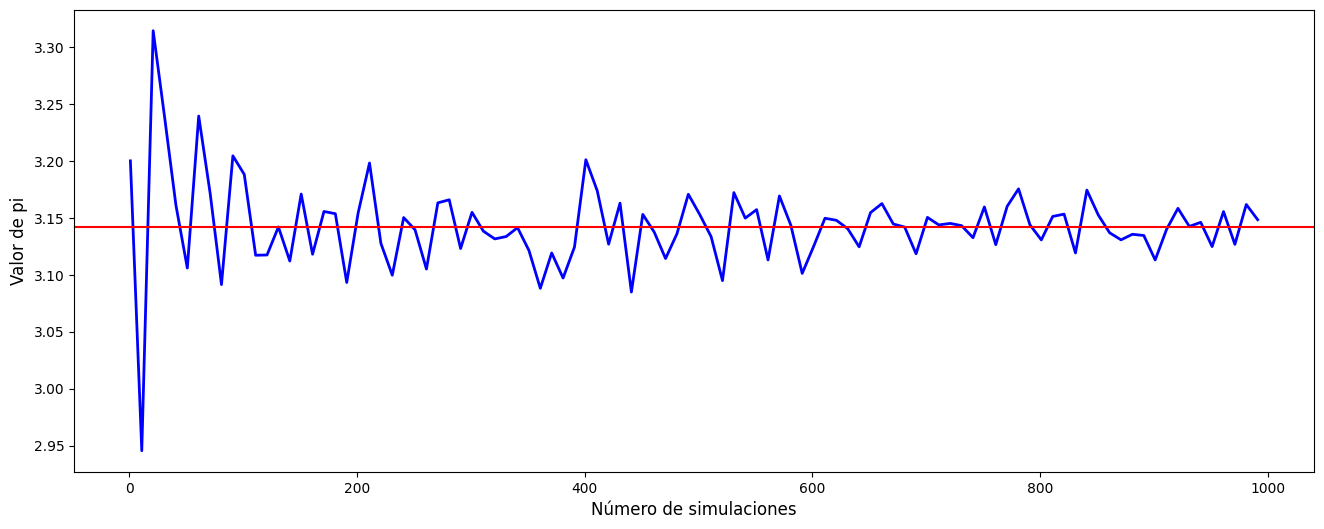

In [ ]:
N = 1000
vpi = []
vpi_std = []
vn = []
for n in np.arange(1,N, 10):
    aux = []
    for s in np.arange(0,10):
        count_inside = 0
        for i in np.arange(0,n):
            x = np.random.uniform(0,1)
            y = np.random.uniform(0,1)
            if( x**2 + y**2 < 1):
                count_inside = count_inside + 1
        pi = 4*count_inside/n
        aux.append(pi)
    vpi.append(np.mean(aux))
    vpi_std.append(np.std(aux))
    vn.append(n)

plt.figure(figsize=(16,6))
plt.plot(vn, vpi, linestyle='-', color="blue", linewidth=2)
plt.axhline(y=np.pi, color='r', linestyle='-')
plt.xlabel("Número de simulaciones", fontsize=12)
plt.ylabel("Valor de pi", fontsize=12)
plt.show(True)

## Semilla de números aleatorios generados

Notemos que la semilla genera una secuencia de números aleatorios y la secuencia se repite cuando reiniciamos la semilla.

In [ ]:
import numpy as np
print("Primeira secuencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)
print('\n')

print("Segunda secuencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)

Primeira secuencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Segunda secuencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Se no reiniciamos la semilla:

In [ ]:
import numpy as np
print("Primeira secuencia:")
np.random.seed(101)
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)
print('\n')

print("Segunda secuencia:")
for i in np.arange(0,10):
    n = np.random.uniform()
    print(n)

Primeira secuencia:
0.5163986277024462
0.5706675868681398
0.028474226478096942
0.17152165622510307
0.6852769816973125
0.8338968626360765
0.3069662196722378
0.8936130796833973
0.7215438617683047
0.18993895420479678


Segunda secuencia:
0.5542275911247871
0.3521319540266141
0.18189240266007867
0.7856017618643588
0.9654832224119693
0.2323536618147607
0.08356143366334368
0.6035484222912185
0.7289927572876178
0.2762388284972628
